In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current dpip install ultralyticsirectory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **IMPORT PACKAGES**

In [4]:
!pip install ultralytics
!pip install roboflow
from ultralytics import YOLO 
from IPython.display import Image
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.232 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5313.4/8062.4 GB disk)


# **LOAD THE TRAINING DATASET**

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="tAFRYqzjQXahvMhjPcZv")
project = rf.workspace("sixray-dpgc6").project("weapon_detection-cuahn")
dataset = project.version(4).download("yolov8")

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.232, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to weapon_detection-4 in yolov8:: 100%|██████████| 6008/6008 [00:01<00:00, 5871.18it/s]


# **LOAD THE MODEL**

In [11]:
yolo8_model_detection =YOLO('yolov8l.pt')
#yolo8_model_detection.predict(source='https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/I-80_Eastshore_Fwy.jpg/1200px-I-80_Eastshore_Fwy.jpg',save_txt=True ,save=True,exist_ok=True)
#Image(filename='runs/detect/predict/1200px-I-80_Eastshore_Fwy.jpg', height=300,width=500) 

# **COPY DATASET IN A NEW DIRECTORY**

In [6]:
import os 
os.makedirs('datasets',exist_ok = True)
!cp -r /kaggle/working/weapon_detection-4 datasets/SixRayFull-2

# **TRAIN MODEL**

In [13]:
# Define dataset path, epochs, image-size, Bacth and output directory.
yolo8_model_detection.train(data= '/kaggle/working/datasets/SixRayFull-2/data.yaml', epochs=75, imgsz=640, batch=32,project='YOLO_weights',name='SIXray_Output',exist_ok=True, device=[0, 1])

Ultralytics YOLOv8.0.232 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
                                                       CUDA:1 (Tesla T4, 15110MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/kaggle/working/datasets/SixRayFull-2/data.yaml, epochs=75, time=None, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=[0, 1], workers=8, project=YOLO_weights, name=SIXray_Output, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


TensorBoard: Start with 'tensorboard --logdir YOLO_weights/SIXray_Output', view at http://localhost:6006/
Overriding model.yaml nc=80 with nc=6
Transferred 589/595 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/working/datasets/SixRayFull-2/weapon_detection-4/train/labels.cache... 2304 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2304/2304 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/datasets/SixRayFull-2/weapon_detection-4/valid/labels.cache... 466 images, 0 backgrounds, 0 corrupt: 100%|██████████| 466/466 [00:00<?, ?it/s]
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Plotting labels to YOLO_weights/SIXray_Output/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
75 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/75        11G      1.155      1.942      1.387         62        640: 100%|██████████| 72/72 [01:00<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:09<00:00,  1.57it/s]


                   all        466       1127      0.532      0.379       0.37      0.243

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/75      11.3G      1.177      1.264      1.439         56        640: 100%|██████████| 72/72 [00:56<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:08<00:00,  1.82it/s]


                   all        466       1127      0.594      0.383        0.4      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/75      11.3G      1.199      1.272      1.462         61        640: 100%|██████████| 72/72 [00:55<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:08<00:00,  1.87it/s]


                   all        466       1127      0.554      0.325      0.384      0.234

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/75      11.3G      1.166      1.182      1.429         80        640: 100%|██████████| 72/72 [00:55<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:08<00:00,  1.87it/s]


                   all        466       1127      0.641       0.34      0.383      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/75      11.3G      1.137      1.149      1.407         56        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.89it/s]


                   all        466       1127      0.652      0.429      0.479      0.331

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/75      11.3G      1.109        1.1        1.4         56        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.90it/s]


                   all        466       1127      0.671      0.448      0.498      0.352

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/75      11.3G      1.118      1.067      1.406         64        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]


                   all        466       1127      0.755      0.482      0.605      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/75      11.3G      1.063      0.991      1.361         49        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]


                   all        466       1127      0.713       0.47      0.535      0.373

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/75      11.3G      1.032     0.9275      1.341         65        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.89it/s]


                   all        466       1127      0.729      0.538      0.595      0.427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/75      11.3G     0.9961     0.9045      1.326         63        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.90it/s]


                   all        466       1127      0.766      0.492      0.572      0.404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/75      11.3G      0.986     0.8707      1.294         85        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.88it/s]


                   all        466       1127      0.769      0.559      0.659      0.471

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/75      11.3G     0.9697     0.8402      1.286         65        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]


                   all        466       1127      0.627      0.678      0.677      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/75      11.3G     0.9743     0.8244      1.296         66        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]


                   all        466       1127      0.772      0.556      0.619      0.467

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/75      11.3G     0.9402     0.8101      1.267         71        640: 100%|██████████| 72/72 [00:55<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.90it/s]


                   all        466       1127      0.887        0.6      0.659      0.461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/75      11.3G     0.9268     0.7763      1.267         91        640: 100%|██████████| 72/72 [00:55<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.89it/s]


                   all        466       1127      0.826      0.665      0.706      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/75      11.3G     0.9576     0.7814       1.29         82        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]


                   all        466       1127      0.795      0.663      0.731       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/75      11.3G     0.9023     0.7299      1.225         96        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.90it/s]


                   all        466       1127      0.957      0.564      0.703       0.53

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/75      11.3G     0.9026     0.7201      1.232         60        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]


                   all        466       1127       0.95      0.575      0.711      0.525

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/75      11.3G     0.9156     0.7108      1.247         84        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]


                   all        466       1127      0.769      0.632      0.637      0.476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/75      11.3G     0.8715     0.6931      1.222         67        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]


                   all        466       1127      0.864       0.61      0.745      0.554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/75      11.3G     0.8766     0.6907      1.226         94        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.90it/s]


                   all        466       1127      0.877      0.638      0.707      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/75      11.3G     0.8541      0.661      1.198         53        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]


                   all        466       1127      0.864      0.703       0.72      0.529

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/75      11.3G     0.8723     0.6696      1.215         98        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.90it/s]


                   all        466       1127      0.868      0.628      0.689      0.526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/75      11.3G     0.8553     0.6461      1.219         70        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]


                   all        466       1127      0.785      0.604      0.656        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/75      11.3G     0.8469     0.6401      1.194         81        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]


                   all        466       1127      0.859      0.688      0.804      0.591

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/75      11.3G     0.8426     0.6432      1.198         62        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.89it/s]


                   all        466       1127      0.918      0.671       0.86      0.631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/75      11.3G      0.825     0.6301      1.181         84        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.88it/s]


                   all        466       1127      0.971      0.605      0.675      0.523

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/75      11.3G     0.8104     0.5986      1.169         79        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.89it/s]


                   all        466       1127      0.895      0.743      0.786       0.58

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/75      11.3G     0.7902     0.5774       1.16         63        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.89it/s]


                   all        466       1127      0.885      0.706      0.875      0.662

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/75      11.3G     0.8159     0.6024       1.18         83        640: 100%|██████████| 72/72 [00:55<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.89it/s]


                   all        466       1127      0.833      0.693      0.701      0.554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/75      11.3G      0.793      0.574      1.162         85        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.89it/s]


                   all        466       1127      0.725      0.891      0.891      0.672

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/75      11.3G     0.7974     0.5918      1.177         74        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.90it/s]


                   all        466       1127      0.872      0.756      0.776      0.567

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/75      11.3G     0.7902     0.5722      1.165         78        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.90it/s]


                   all        466       1127      0.911      0.641      0.873      0.698

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/75      11.3G     0.7804     0.5642      1.154         84        640: 100%|██████████| 72/72 [00:55<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.90it/s]


                   all        466       1127      0.855       0.83      0.879      0.703

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/75      11.3G     0.8022     0.5734      1.168         74        640: 100%|██████████| 72/72 [00:55<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]


                   all        466       1127      0.916      0.664      0.705       0.55

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/75      11.3G     0.7741     0.5605      1.155         77        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.90it/s]


                   all        466       1127      0.914      0.659      0.884      0.705

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/75      11.3G     0.7568      0.535      1.137         84        640: 100%|██████████| 72/72 [00:55<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]


                   all        466       1127      0.779      0.927      0.932      0.715

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/75      11.3G     0.7689     0.5508      1.143         71        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.89it/s]


                   all        466       1127      0.921      0.908       0.94      0.741

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/75      11.3G     0.7612      0.543      1.144         69        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.88it/s]


                   all        466       1127      0.925      0.921      0.948      0.743

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/75      11.3G      0.753     0.5387      1.138         47        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.90it/s]


                   all        466       1127      0.943      0.877       0.93      0.754

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/75      11.3G     0.7386     0.5165      1.123         61        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.90it/s]


                   all        466       1127      0.946      0.882       0.93      0.732

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/75      11.3G     0.7395     0.5201      1.135         77        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.89it/s]


                   all        466       1127      0.817      0.913        0.9      0.709

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/75      11.3G     0.7438     0.5206      1.133         83        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.88it/s]


                   all        466       1127      0.967      0.861      0.909      0.732

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/75      11.3G     0.7083     0.4952      1.101         92        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.89it/s]


                   all        466       1127      0.789      0.842      0.856      0.696

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/75      11.3G     0.7055     0.4921      1.099         62        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.90it/s]


                   all        466       1127      0.862      0.843      0.874      0.695

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/75      11.3G     0.7238      0.505      1.111         63        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.90it/s]


                   all        466       1127      0.797      0.879      0.907      0.702

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/75      11.3G     0.7265     0.4935      1.117         66        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.89it/s]


                   all        466       1127      0.903      0.833      0.905      0.729

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/75      11.3G     0.7096     0.4824      1.105         49        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]


                   all        466       1127      0.817      0.893      0.934       0.74

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/75      11.3G     0.6861     0.4666      1.083         70        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.89it/s]


                   all        466       1127      0.917      0.884      0.943       0.73

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/75      11.3G     0.6912     0.4609      1.106         68        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.90it/s]


                   all        466       1127      0.887      0.938      0.941      0.724

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/75      11.3G     0.6889     0.4577       1.09         88        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]


                   all        466       1127      0.948      0.826      0.918        0.7

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/75      11.3G     0.6924     0.4673       1.09         68        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]


                   all        466       1127       0.74      0.926      0.899       0.72

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/75      11.3G     0.6847     0.4601      1.087         69        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]


                   all        466       1127      0.873      0.853      0.903       0.74

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/75      11.3G     0.6842     0.4606      1.091         55        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]


                   all        466       1127      0.867      0.871      0.844      0.671

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/75      11.3G     0.6562     0.4409      1.077         93        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]


                   all        466       1127      0.846      0.933      0.941      0.771

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/75      11.3G     0.6561     0.4407      1.069         85        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.89it/s]


                   all        466       1127      0.943      0.818      0.912      0.753

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/75      11.3G     0.6519     0.4294      1.067         53        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.90it/s]


                   all        466       1127       0.93      0.823      0.874      0.745

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/75      11.3G     0.6587     0.4461      1.082         81        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]


                   all        466       1127       0.88      0.884      0.896      0.759

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/75      11.3G     0.6656     0.4467      1.081         71        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]


                   all        466       1127      0.824       0.86      0.871      0.733

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/75      11.3G     0.6442     0.4284      1.052         57        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]


                   all        466       1127      0.946       0.89      0.929      0.753

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/75      11.3G     0.6237     0.4182      1.051         69        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]


                   all        466       1127      0.933      0.894      0.946      0.766

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/75      11.3G     0.6239     0.4144      1.059         66        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]


                   all        466       1127      0.919      0.914      0.945      0.775

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/75      11.3G     0.6357     0.4219      1.058         75        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]


                   all        466       1127       0.93      0.855      0.933      0.758

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/75      11.3G     0.6231     0.4139      1.054         91        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]


                   all        466       1127       0.92       0.87      0.921      0.765

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/75      11.3G     0.6181     0.4095      1.054         69        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]


                   all        466       1127      0.967      0.879      0.928      0.769
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/75      11.3G     0.5223     0.2871     0.9976         38        640: 100%|██████████| 72/72 [00:56<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]


                   all        466       1127      0.926      0.829      0.902      0.749

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/75      11.3G     0.5198     0.2844      1.003         38        640: 100%|██████████| 72/72 [00:55<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]


                   all        466       1127       0.93      0.887      0.926      0.778

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/75      11.3G     0.5246     0.2875      1.006         46        640: 100%|██████████| 72/72 [00:55<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]


                   all        466       1127       0.94      0.885      0.927      0.784

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/75      11.3G     0.4991     0.2683     0.9794         40        640: 100%|██████████| 72/72 [00:55<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]


                   all        466       1127      0.831      0.889      0.903      0.781

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/75      11.3G     0.4953     0.2702     0.9778         37        640: 100%|██████████| 72/72 [00:55<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.89it/s]


                   all        466       1127      0.949      0.862      0.929      0.779

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/75      11.3G     0.4988     0.2769     0.9841         33        640: 100%|██████████| 72/72 [00:54<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]


                   all        466       1127      0.838      0.939      0.924      0.778

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/75      11.3G      0.493     0.2667     0.9765         31        640: 100%|██████████| 72/72 [00:55<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]


                   all        466       1127      0.939       0.83      0.926      0.768

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/75      11.3G      0.485     0.2651     0.9812         37        640: 100%|██████████| 72/72 [00:55<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]


                   all        466       1127      0.936      0.831      0.925      0.766

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/75      11.3G     0.4721     0.2529     0.9574         32        640: 100%|██████████| 72/72 [00:55<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.90it/s]


                   all        466       1127      0.944      0.838      0.926      0.781

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/75      11.3G      0.478     0.2575     0.9653         41        640: 100%|██████████| 72/72 [00:55<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.89it/s]


                   all        466       1127      0.942      0.837      0.926      0.789

75 epochs completed in 1.382 hours.
Optimizer stripped from YOLO_weights/SIXray_Output/weights/last.pt, 87.6MB
Optimizer stripped from YOLO_weights/SIXray_Output/weights/best.pt, 87.6MB

Validating YOLO_weights/SIXray_Output/weights/best.pt...
Ultralytics YOLOv8.0.232 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
                                                       CUDA:1 (Tesla T4, 15110MiB)
Model summary (fused): 268 layers, 43611234 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:09<00:00,  1.51it/s]


                   all        466       1127      0.942      0.837      0.926      0.789
                   Gun        466        645      0.991      0.975      0.994      0.861
                Hammer        466          1       0.84          1      0.995      0.995
                 Knife        466        319      0.987      0.903      0.974      0.772
                Pliers        466         84      0.987      0.964      0.991       0.86
              Scissors        466          4      0.863       0.25      0.626      0.402
                Wrench        466         74      0.985      0.932      0.976      0.842
Speed: 0.5ms preprocess, 12.7ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to YOLO_weights/SIXray_Output


# **VAIDATE MODEL**

In [8]:
# Load a model
model = YOLO('/kaggle/working/YOLO_weights/SIXray_Output/weights/best.pt')  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.0.232 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 268 layers, 43611234 parameters, 0 gradients, 164.8 GFLOPs


val: Scanning /kaggle/working/datasets/SixRayFull-2/weapon_detection-4/valid/labels.cache... 466 images, 0 backgrounds, 0 corrupt: 100%|██████████| 466/466 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/30 [00:00<?, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 290.00 MiB (GPU 0; 14.76 GiB total capacity; 1.30 GiB already allocated; 209.75 MiB free; 1.59 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

# **MODEL TESTING**


image 1/228 /kaggle/working/weapon_detection-4/test/images/N0000166_jpg.rf.7c9383f5d79cb9782b6cfdc3d7a07cdd.jpg: 640x544 2 Knifes, 1 Wrench, 78.9ms
image 2/228 /kaggle/working/weapon_detection-4/test/images/N0000637_jpg.rf.e0231f9c6a1e34bdd9d8557b1fd94073.jpg: 640x544 (no detections), 52.8ms
image 3/228 /kaggle/working/weapon_detection-4/test/images/N0001322_jpg.rf.f31610478a5bac2138f59e3998167bb1.jpg: 416x640 1 Knife, 78.3ms
image 4/228 /kaggle/working/weapon_detection-4/test/images/N0001930_jpg.rf.ab588e56ff560500342d9a0107528528.jpg: 416x640 1 Scissors, 37.0ms
image 5/228 /kaggle/working/weapon_detection-4/test/images/N0002052_jpg.rf.53c9314bae8470c3190c7775cd2b1b4a.jpg: 416x640 1 Wrench, 36.9ms
image 6/228 /kaggle/working/weapon_detection-4/test/images/N0002224_jpg.rf.270fe5c038044d2f32f3c57c26f127ce.jpg: 416x640 1 Gun, 37.0ms
image 7/228 /kaggle/working/weapon_detection-4/test/images/N0002236_jpg.rf.67e72fa7490a83edb470ee92ff0cba2c.jpg: 416x640 1 Gun, 37.0ms
image 8/228 /kaggle/w

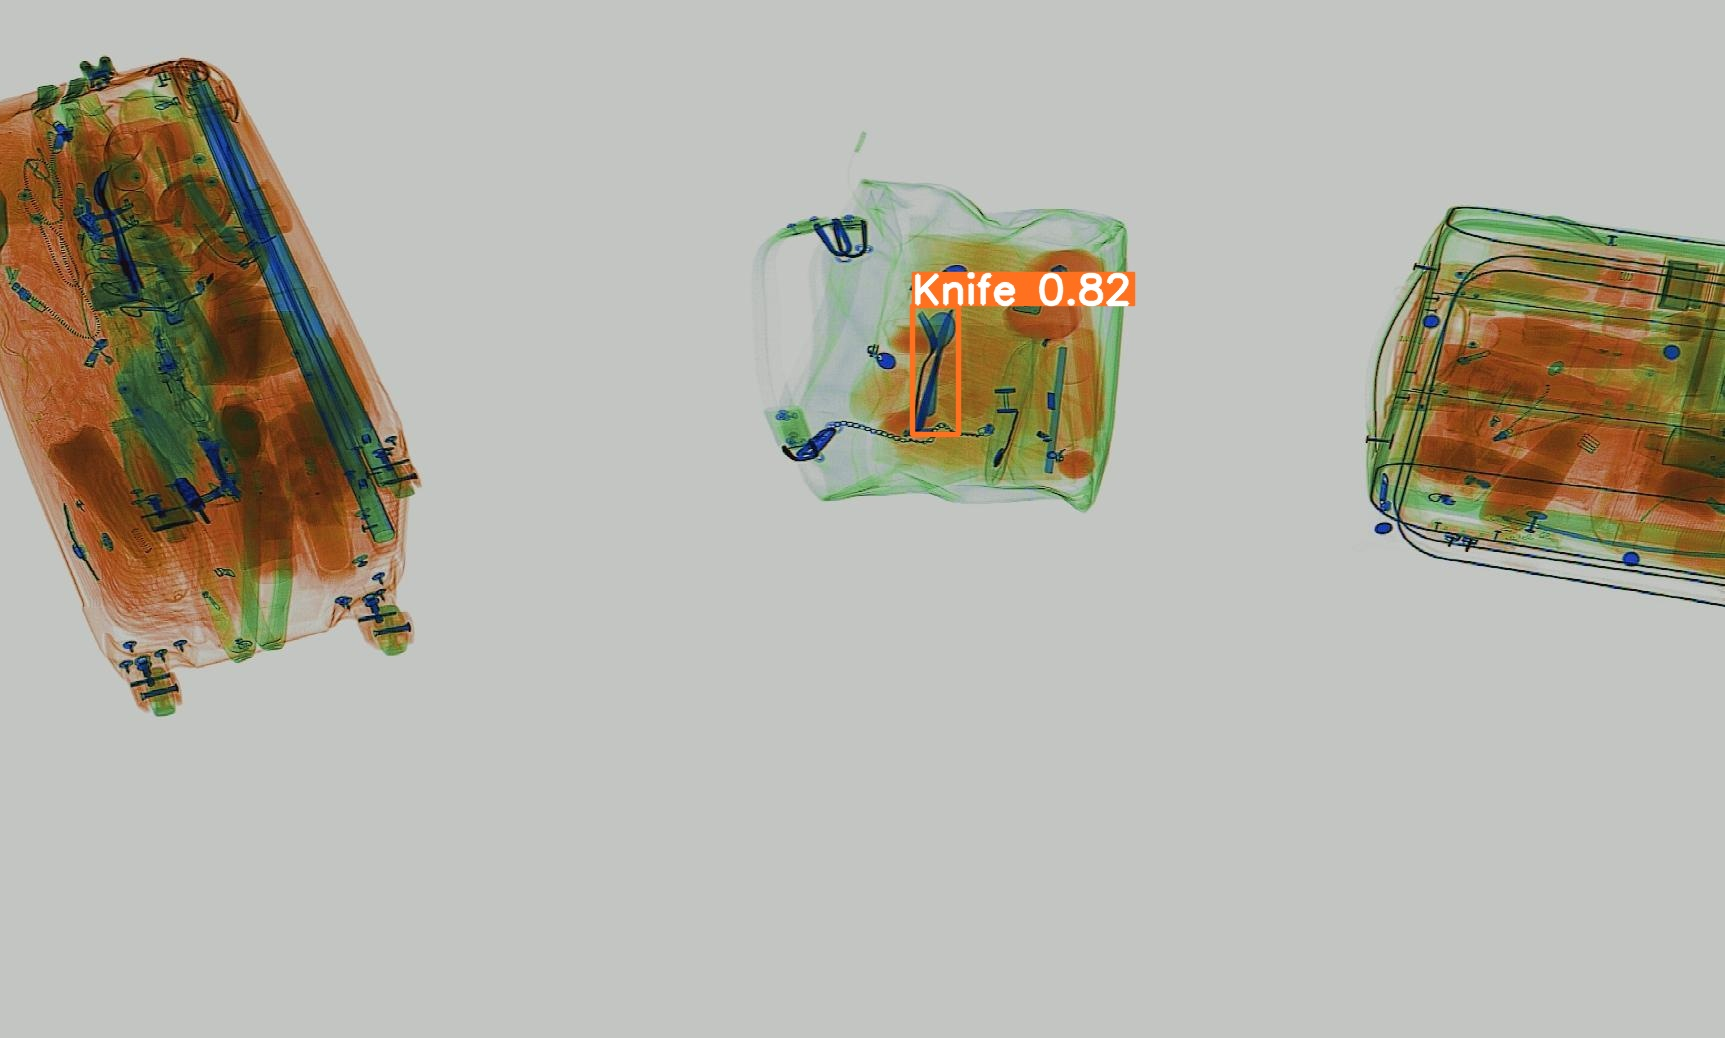

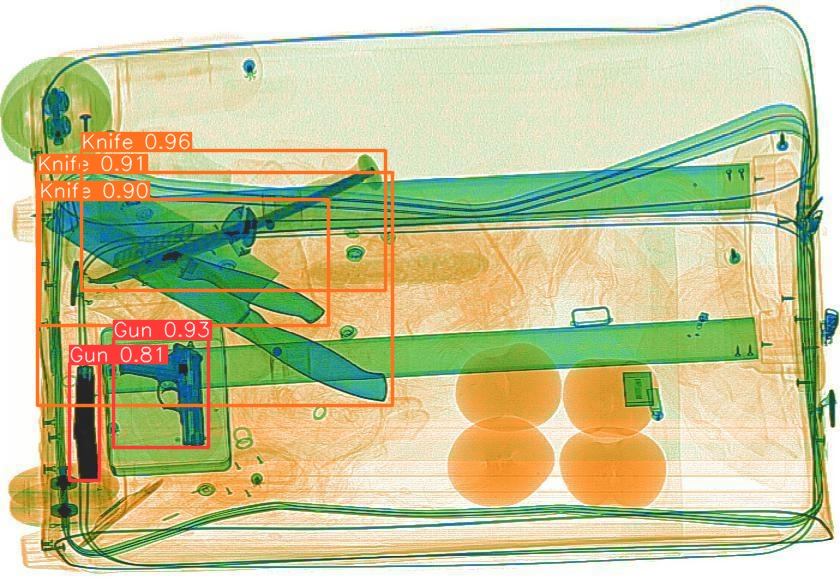

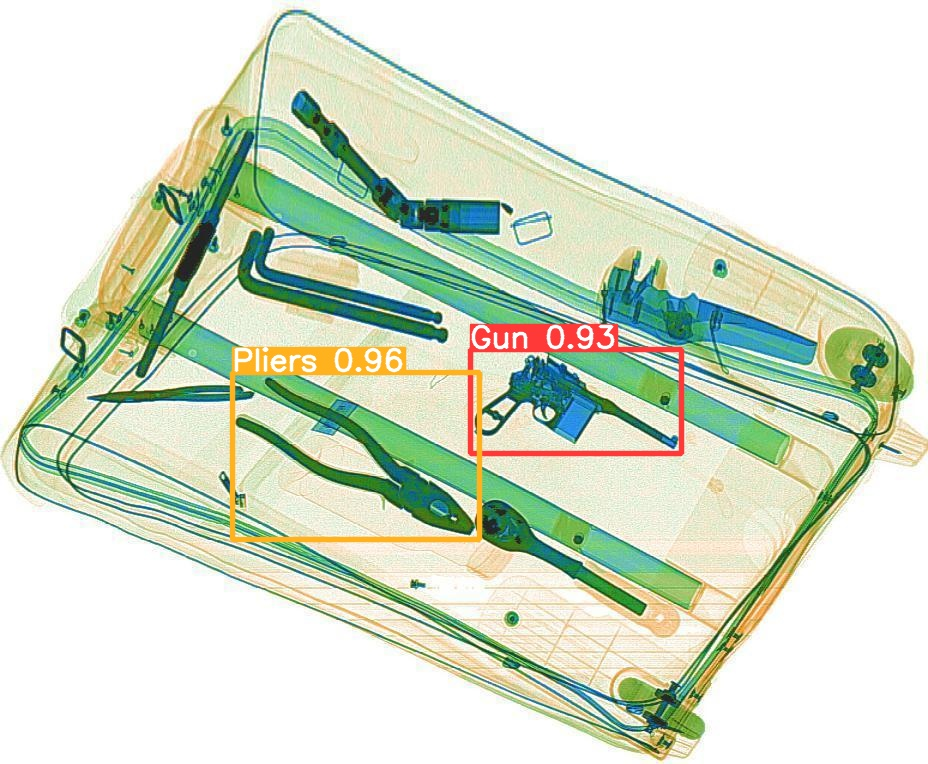

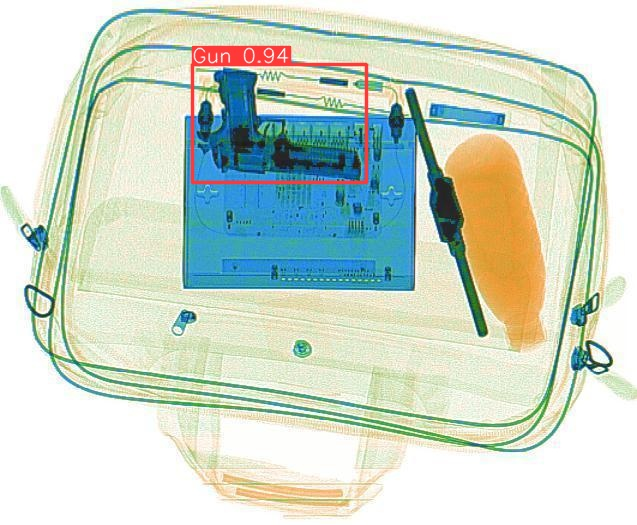

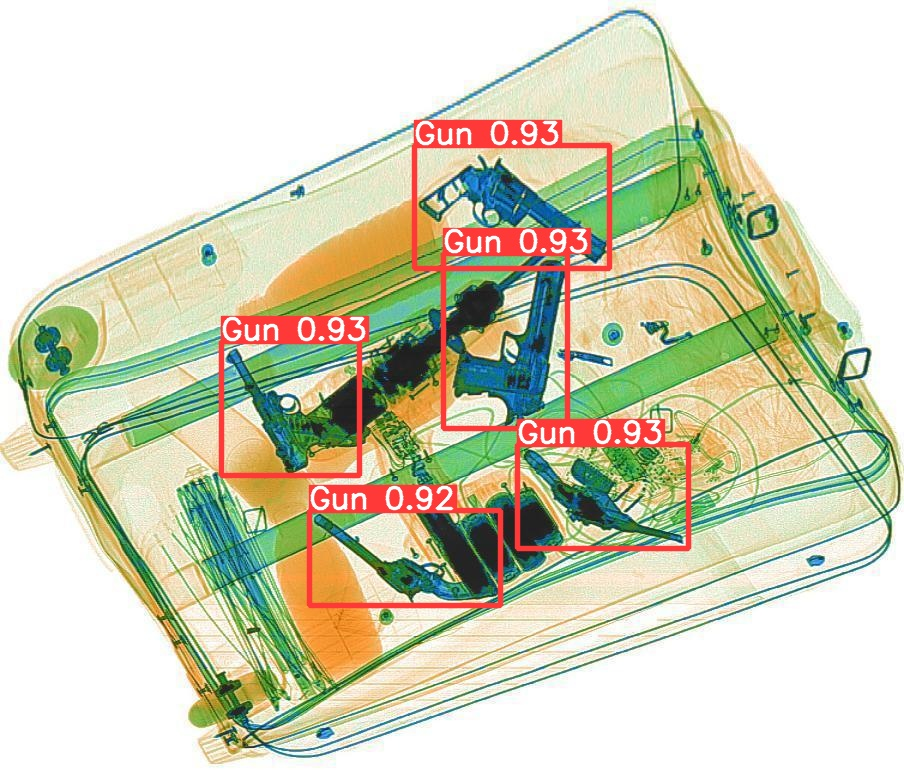

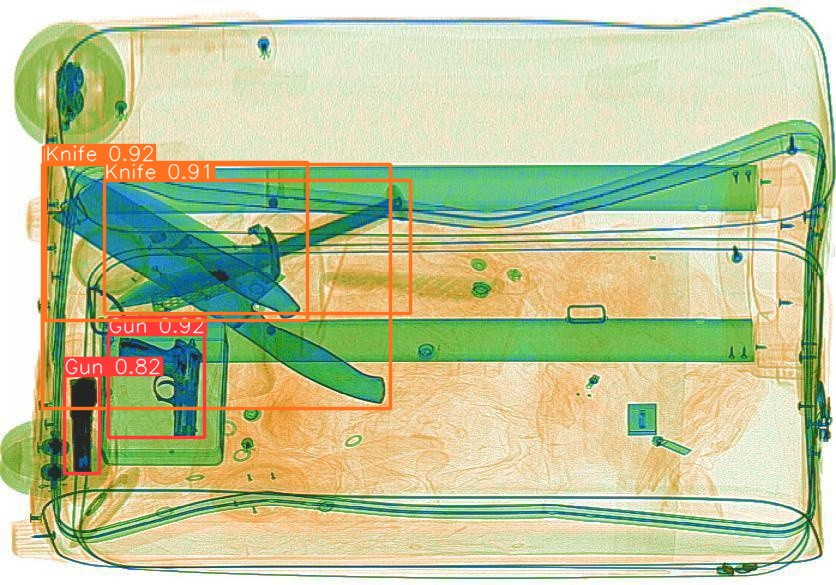

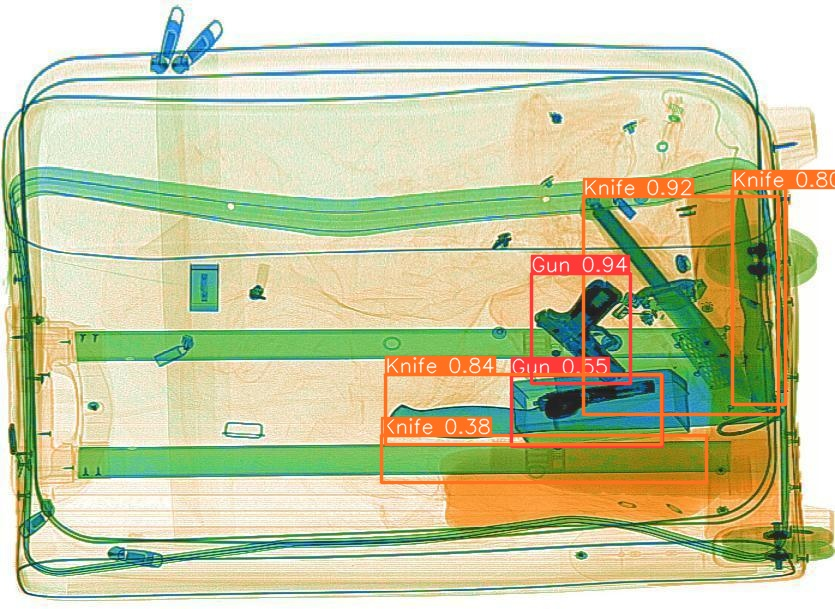

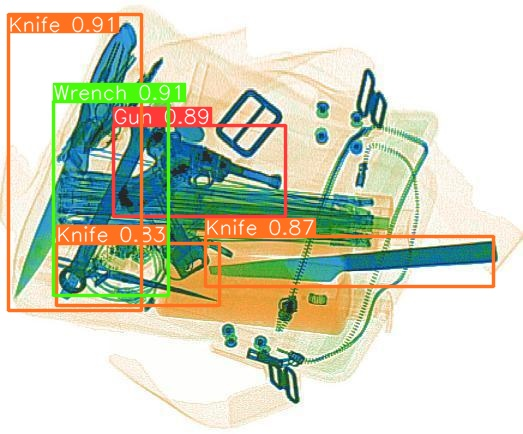

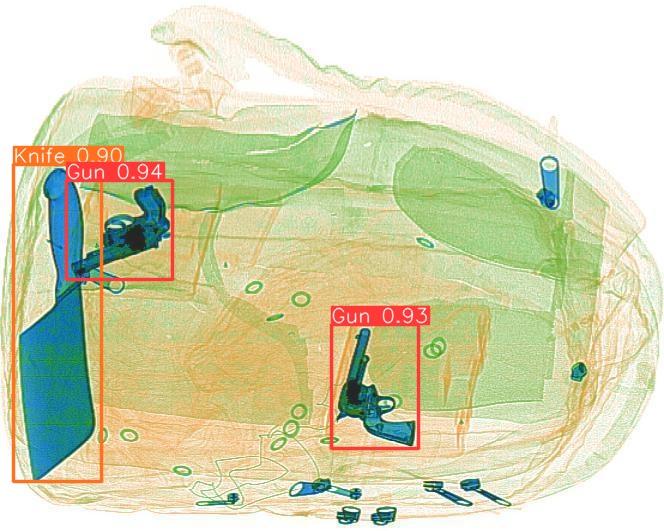

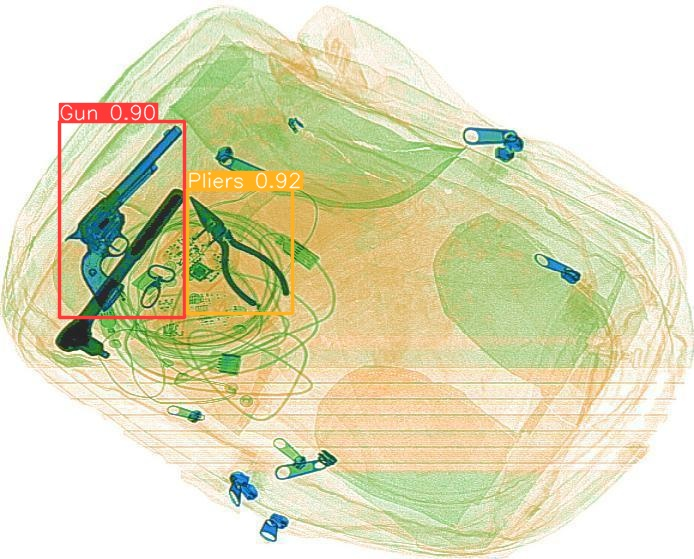

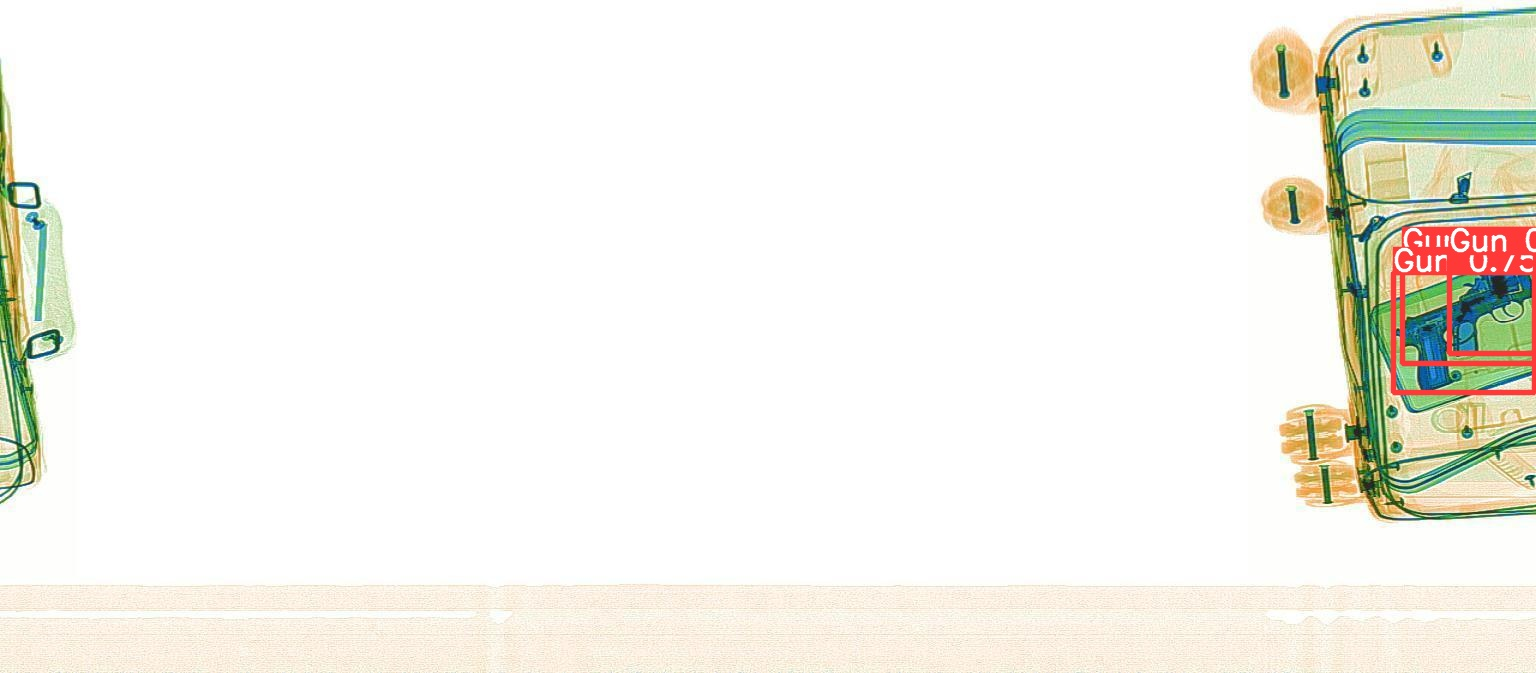

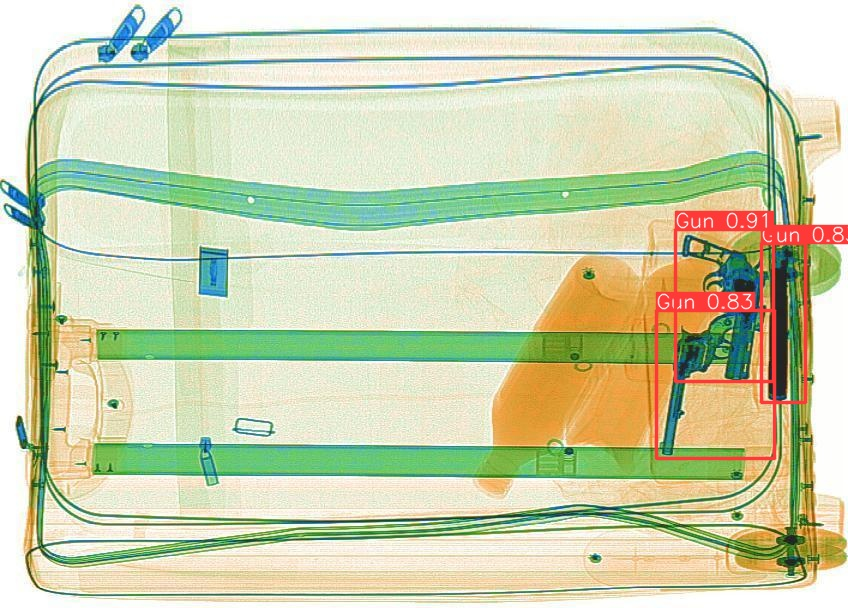

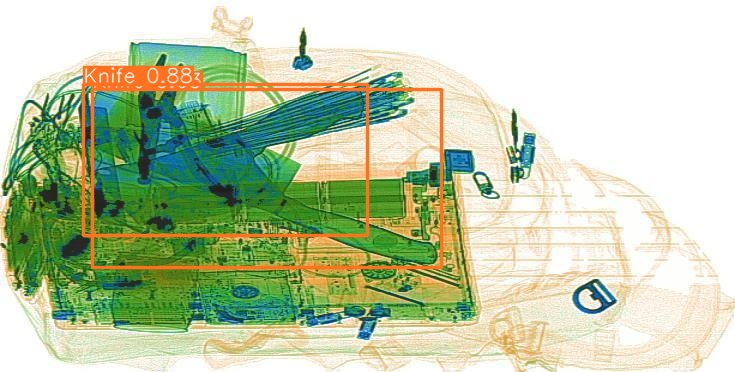

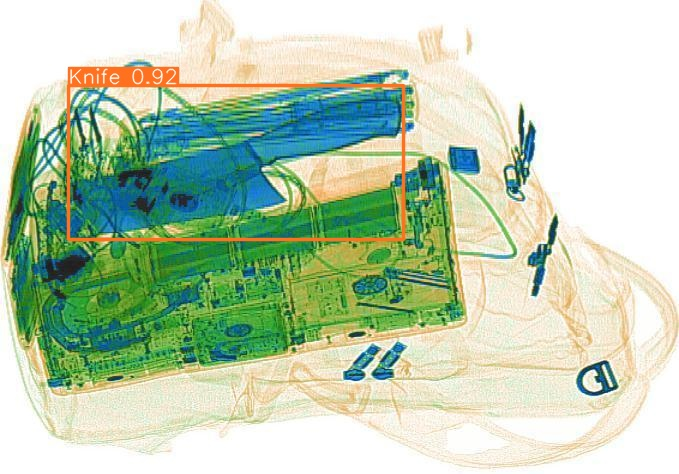

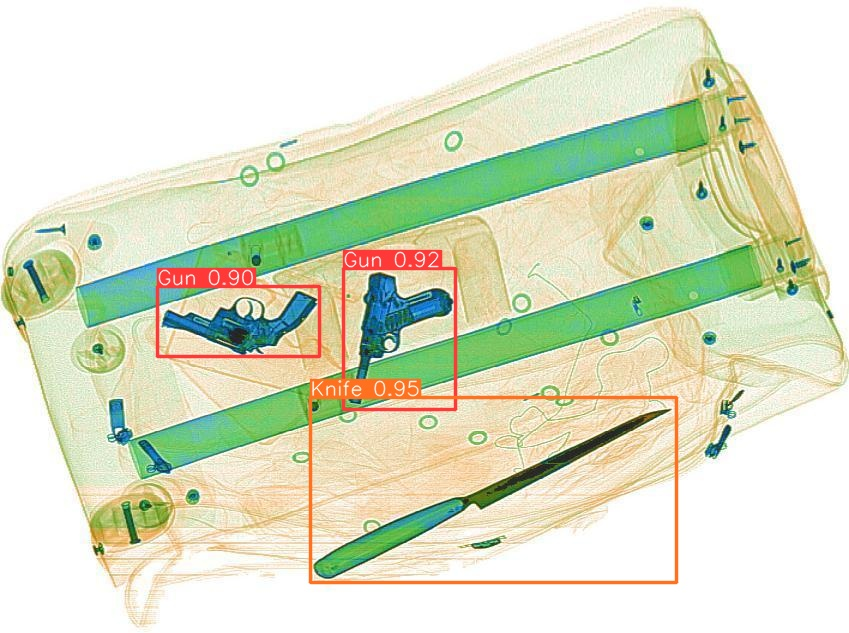

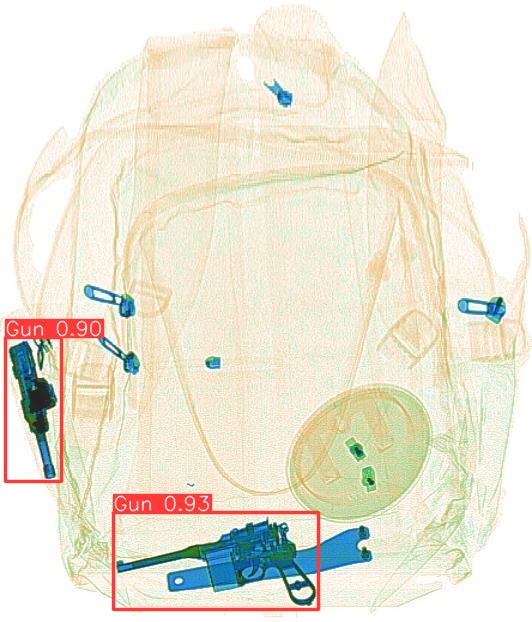

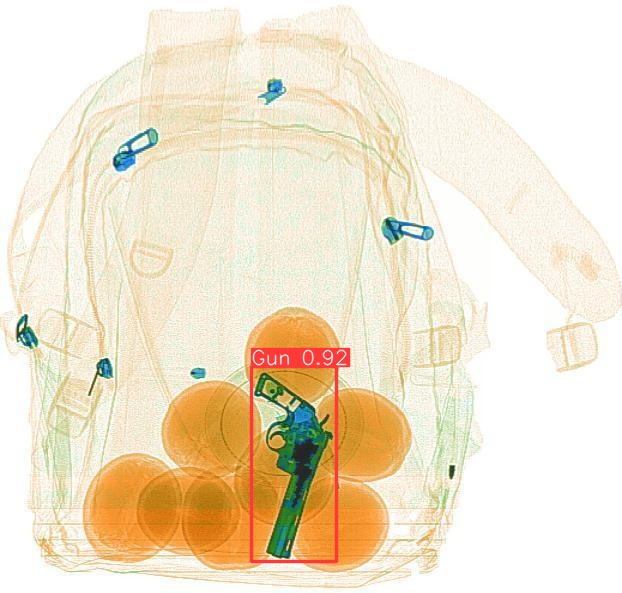

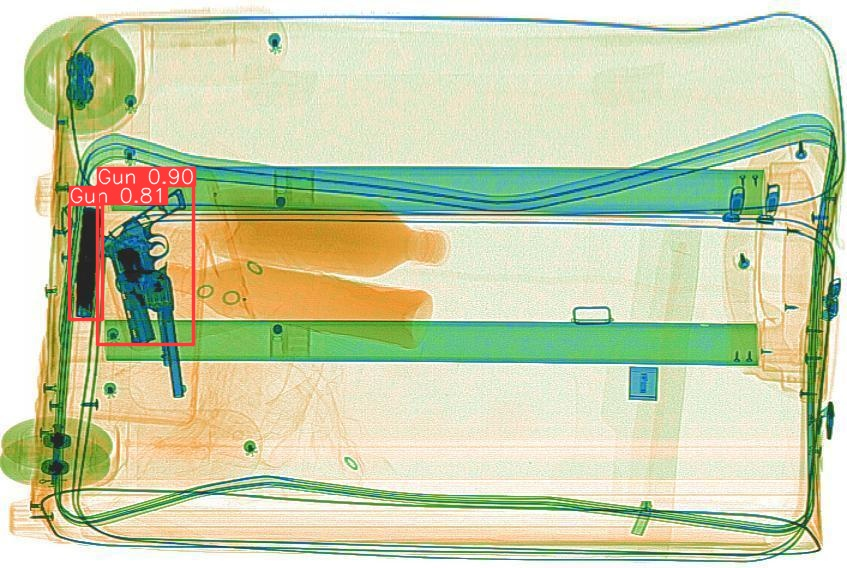

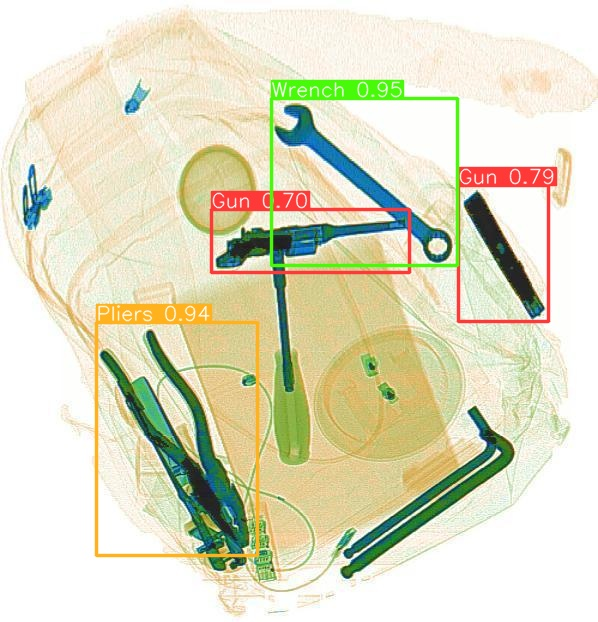

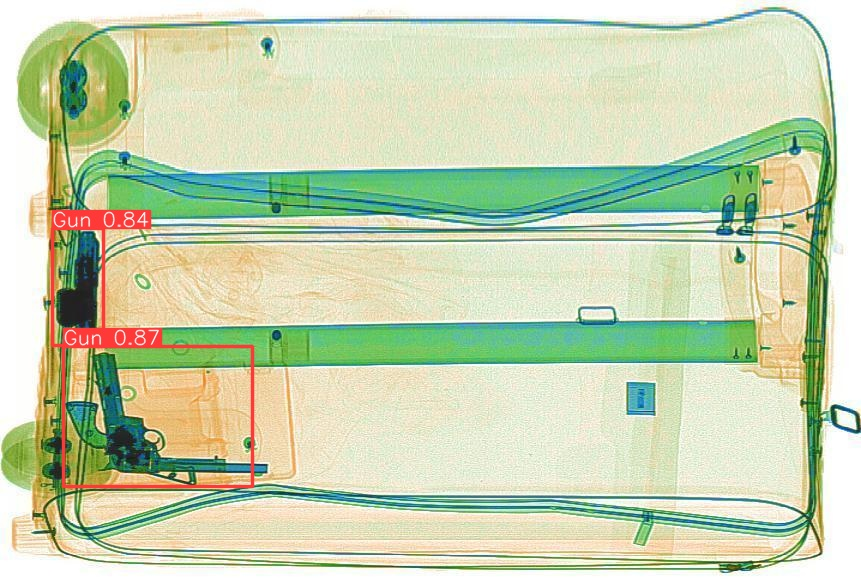

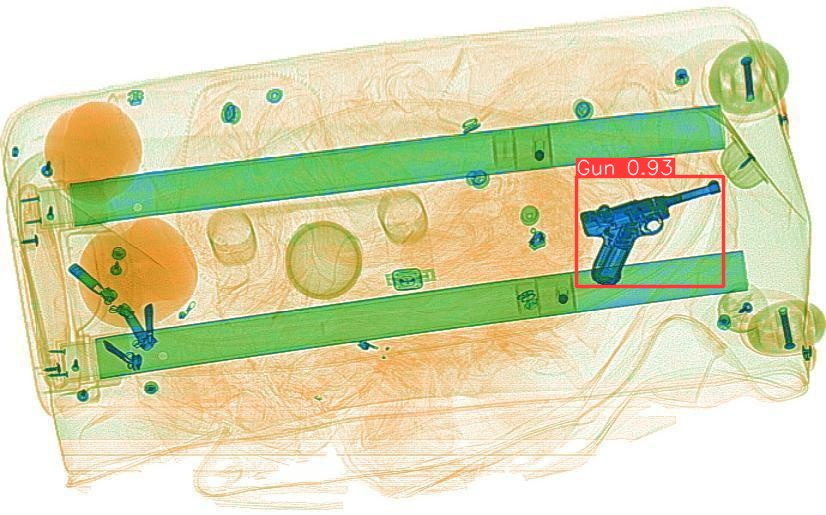

In [5]:
yolo8_model_detection=YOLO('/kaggle/working/YOLO_weights/SIXray_Output/weights/best.pt')
yolo8_model_detection.predict(source='/kaggle/working/weapon_detection-4/test/images', save=True )
from IPython.display import Image, display
import os
res_path='runs/detect/predict'
for image in os.listdir(res_path)[-25:]: # Displaying only 10 results
  # print(os.path.join(res_path,image))
  display(Image(filename=os.path.join(res_path,image), height=300,width=500))

# **MODEL BENCHMARK**

In [6]:
from ultralytics.utils.benchmarks import benchmark

# Benchmark on GPU with training configurations
benchmark(model= yolo8_model_detection, data='/kaggle/working/datasets/sixray100-1/data.yaml', imgsz=640, half=False, device=0)


Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5314.0/8062.4 GB disk)

Benchmarks complete for best.pt on /kaggle/working/datasets/sixray100-1/data.yaml at imgsz=640 (314.88s)
                   Format Status❔  Size (MB) metrics/mAP50-95(B) Inference time (ms/im)
0                 PyTorch       ❎       83.6                None                   None
1             TorchScript       ❎      167.0                None                   None
2                    ONNX       ❎      166.6                None                   None
3                OpenVINO       ❌        0.0                None                   None
4                TensorRT       ❎      229.4                None                   None
5                  CoreML       ❌        0.0                None                   None
6   TensorFlow SavedModel       ❎      416.6                None                   None
7     TensorFlow GraphDef       ❎      166.7                None                   None
8         TensorFlow Lite       ❌       

Format Status❔  Size (MB) metrics/mAP50-95(B) Inference time (ms/im)
0                 PyTorch       ❎       83.6                None                   None
1             TorchScript       ❎      167.0                None                   None
2                    ONNX       ❎      166.6                None                   None
3                OpenVINO       ❌        0.0                None                   None
4                TensorRT       ❎      229.4                None                   None
5                  CoreML       ❌        0.0                None                   None
6   TensorFlow SavedModel       ❎      416.6                None                   None
7     TensorFlow GraphDef       ❎      166.7                None                   None
8         TensorFlow Lite       ❌        0.0                None                   None
9     TensorFlow Edge TPU       ❌        0.0                None                   None
10          TensorFlow.js       ❌        0.0                None                   None
11           PaddlePaddle       ❎      333.2                None                   None
12                   ncnn       ❌        0.0                None                   None

In [9]:
!zip -r YOLOvl_weights.zip /kaggle/working/YOLO_weights/

  adding: kaggle/working/YOLO_weights/ (stored 0%)
  adding: kaggle/working/YOLO_weights/SIXray_Output/ (stored 0%)
  adding: kaggle/working/YOLO_weights/SIXray_Output/events.out.tfevents.1704126796.7e1037483f4f.416.0 (deflated 92%)
  adding: kaggle/working/YOLO_weights/SIXray_Output/val_batch1_pred.jpg (deflated 11%)
  adding: kaggle/working/YOLO_weights/SIXray_Output/results.csv (deflated 85%)
  adding: kaggle/working/YOLO_weights/SIXray_Output/weights/ (stored 0%)
  adding: kaggle/working/YOLO_weights/SIXray_Output/weights/best.onnx (deflated 18%)
  adding: kaggle/working/YOLO_weights/SIXray_Output/weights/best.pt (deflated 8%)
  adding: kaggle/working/YOLO_weights/SIXray_Output/weights/best.pb (deflated 7%)
  adding: kaggle/working/YOLO_weights/SIXray_Output/weights/best_paddle_model/ (stored 0%)
  adding: kaggle/working/YOLO_weights/SIXray_Output/weights/best_paddle_model/inference_model/ (stored 0%)
  adding: kaggle/working/YOLO_weights/SIXray_Output/weights/best_paddle_model/inf